
### <center>Procesamiento Digital de Señales de Audio</center>
#### <center>Instituto de Ingeniería Eléctrica - UdelaR</center>
# Hoja de Ejercicios 4 - Curso 2024
### Análisis homomórfico
### Análisis por predicción lineal


## Pautas para el práctico
 - La realización del presente trabajo es individual.
 - Es necesario abordar todos los ejercicios propuestos.
 - Se espera la entrega de un PDF escrito en $\LaTeX$ o similar. El mismo tendrá:
     - Máximo de 14 páginas
     - Máximo de 2500 palabras
 - También se espera la entrega del código escrito, en scripts Python o en este mismo Jupyter Notebook.
 - La corrección del práctico se hará sobre lo entregado en el PDF, pero podremos apoyarnos en el razonamiento y comprensión demostrado en el código escrito. Recomendamos escribir el código de forma prolija para facilitar la comprensión presente y futura tanto de nosotros como de ustedes.
 - Los ejercicios marcados como $\blacklozenge$ son opcionales.


**Nombre de el/la estudiante:** Silvina Datz

### Como correr este notebook

Es posible descargarlo y correrlo localmente en su computadora

Tambien pueden correrlo en Google Colab usando el siguiente link.

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/practicos/AudioDSP_Practico_4.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Correr en Google Colab</a>
  </td>
</table>

In [25]:
# Al correr esta celda, se podrá acceder a archivos
# y carpetas en su cuenta de google drive.
# Puede ver la estructura de carpetas apretando en
# el icono de carpeta de la barra lateral izquierda.

try:
    from google.colab import drive
    drive.mount('/content/drive')

    ### Camino a carpeta de los archivos (ajustarlo segun corresponda)
    dir_files = './drive/MyDrive/DSPAudio/Practico4/Archivos_P4/'

except:
  dir_files = './Archivos_P4/'

print(f'Files path: {dir_files}')

Files path: ./Archivos_P4/


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io, signal
from scipy.linalg import solve, toeplitz
from scipy.io.wavfile import read
from IPython.display import Audio
from scipy.spatial.distance import cdist

# Ejercicio 1

En este ejercicio se estudia el cepstrum de señales de audio. Según el modelo del mecanismo de producción de la voz, la señal de voz se puede expresar como $s[n]=p[n]*h[n]$, donde $p[n]$ es la señal de excitación y $h[n]$ es la respuesta al impulso del tracto vocal. Mediante el cepstrum complejo se pretende deconvolucionar la señal de voz en la excitación y la respuesta al impulso.


## Parte 1


1. En el caso de sonidos sonoros, la excitación $p[n]$ es un tren de pulsos periódico,

    $$p[n]=\beta^n\sum_{k=0}^{\infty}\delta[n-kP]$$

    Calcular analíticamente el cepstrum complejo $\hat{p}[n]$ de $p[n]$. Graficar empleando los valores $\beta = 0.99$ y $P=100$.

2. Calcular analíticamente el cepstrum complejo $\hat{h}[n]$ de la secuencia $h[n]$ cuya transformada $\mathcal{Z}$ es
  $$ H(z) = \frac{(1-bz)(1-b^*z)}{(1-cz^{-1})(1-c^*z^{-1})},\;\;\;\textrm{con }|b|,|c|<1 $$

$\qquad$ Graficar empleando los valores $b=0.98e^{j0.81\pi}$ y $c=0.98e^{j0.19\pi}$.

3. Considere ahora la señal $s[n]=h[n]*p[n]$. Calcular analíticamente el cepstrum $\hat{s}[n]$ de $s[n]$.

4. Calcular el cepstrum complejo de las señales $p[n]$ y $h[n]$ utilizando la Transformada Discreta Fourier. Comparar con el resultado analítico y comentar los resultados.

5. Se desea recuperar la respuesta al impulso $h[n]$ a partir de la señal $s[n]$. Para hacerlo, liftrar el cepstrum complejo $\hat{s}[n]$ apropiadamente eliminando los componentes de altas quefrencys y aplicar el cepstrum inverso. Comparar gráficamente la respuesta al impulso recuperada con la respuesta al impulso verdadera.


1.

El cepstrum complejo es la salida del sistema característico que transforma convoluciones en sumas. Se puede calcular mediante las siguiente operaciones: aplicar transformada Z, computar el logaritmo complejo y finalmente antitransformar mediante $Z^{-1}$.

Se calcula entonces el cepstrum complejo de $p[n]$:

$$P(z) = \sum_{n=-\infty}^{\infty} p[n]z^{-n} =  \sum_{n=-\infty}^{\infty} z^{-n} \beta^n \sum_{k=0}^{\infty}\delta[n-kP] = \sum_{k=0}^{\infty} z^{-kP} \beta^{kP} = \sum_{k=0}^{\infty} (z^{-P} \beta^{P}) ^k =  \frac{1}{1- z^{-P} \beta^{P}}, |z^{-P} \beta^{P}|<1$$
$$\hat{P(z)} = \log{(P(z))} =-\log{(1- z^{-P} \beta^{P})}=\sum_{k=1}^\infty \frac{\beta^{kP} z^{-kP}}{k}, |z^{P}|> |\beta^{P}|$$
$$\hat{p}[n] =  \mathcal{Z^{-1}}(\log{(P(z))}) = \mathcal{Z^{-1}} \left( \sum_{k=1}^\infty \frac{\beta^{kP} z^{-kP}}{k} \right) = \mathcal{Z^{-1}} \left( \sum_{k=1}^\infty \frac{\beta^{kP} z^{-kP}}{k} \right) = \frac{P \beta^n}{n} \sum_{k=1}^{\infty}\delta[n-kP]$$


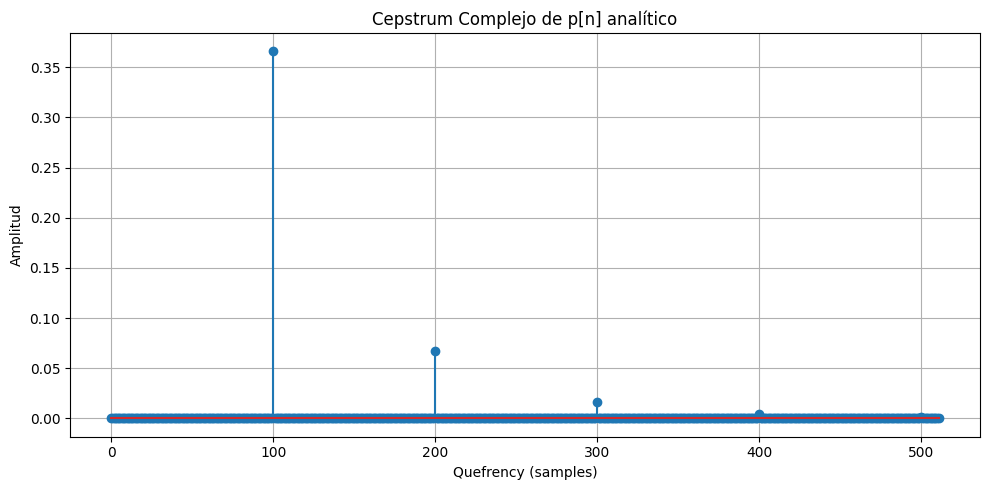

In [27]:
beta = 0.99
P = 100     # period in samples
N = 1024     # number of samples

hat_p_analitico = np.zeros(N)
k = np.arange(1, np.floor((N-1)/P)+1)
kP = k * P
kP = kP.astype(int)
hat_p_analitico[kP] = P * beta**kP / kP

plt.figure(figsize=(10, 5))
plt.stem(hat_p_analitico[:N//2])
plt.grid()
plt.xlabel('Quefrency (samples)')
plt.ylabel('Amplitud')
plt.title(f'Cepstrum Complejo de p[n] analítico')
plt.tight_layout()
plt.show()


2.

Se calcula el cepstrum complejo de h[n]:

<!-- $$\hat{H(z)} = \log{(H(z))} = \log{(1-bz)} + \log{(1-b^*z)} - \log{(1-cz^{-1})} - \log{(1-c^*z^{-1})}$$ -->

$$\begin{align*}
    \hat{H(z)} &= \log{(H(z))} \\
    &=   \log{(1-bz)} + \log{(1-b^*z)} - \log{(1-cz^{-1})} - \log{(1-c^*z^{-1})}\\
    &=  - \sum_{k=1}^{\infty} \frac{b^k}{k}z^{k}  - \sum_{k=1}^{\infty} \frac{{b^*}^k}{k}z^{k} + \sum_{k=1}^{\infty} \frac{c^k}{k}z^{-k} + \sum_{k=1}^{\infty} \frac{{c^*}^k}{k}z^{-k}\\
    &=   \sum_{k=1}^{\infty} \frac{c^k+{c^*}^k}{k}z^{-k} - \sum_{k=1}^{\infty} \frac{b^k + {b^*}^k}{k}z^{k}\\
    &=   \sum_{k=1}^{\infty} \frac{{(|c| e^{j\theta_c }})^k+{(|c| e^{-j\theta_c }})^k}{k}z^{-k} - \sum_{k=1}^{\infty} \frac{{(|b| e^{j\theta_b }})^k + {(|b| e^{-j\theta_b }})^k}{k}z^{k}\\
    &=   \sum_{k=1}^{\infty} \frac{e^{j\theta_c k}+ e^{-j\theta_c k}}{k}|c|^k z^{-k} - \sum_{k=1}^{\infty} \frac{e^{j\theta_b k}+ e^{-j\theta_b k}}{k}|b|^k z^{k}\\
    &=   \sum_{k=1}^{\infty} \frac{2\cos{(\theta_c k)}}{k}|c|^k z^{-k} - \sum_{k=1}^{\infty} \frac{2\cos{(\theta_b k)}}{k}|b|^k z^{k}\\
    &=   \sum_{k=0}^{\infty} \frac{2\cos{(\theta_c k)}}{k}|c|^k z^{-(k+1)} - \sum_{k=0}^{\infty} \frac{2\cos{(\theta_b k)}}{k}|b|^k z^{k+1}\\
    &=   z^{-1}\sum_{k=0}^{\infty} \frac{2\cos{(\theta_c k)}}{k}|c|^k z^{-k} - z\sum_{k=0}^{\infty} \frac{2\cos{(\theta_b k)}}{k}|b|^k z^{k}\\
\end{align*}$$

Utilizando las definición de Transformada Z y las siguientes propiedades se puede calcular $\mathcal{Z^{-1}}(\hat{H(z)})$:
- $\mathcal{Z}{(x[n-n_0])} = z^{-n_0}X(z)$
- $\mathcal{Z}{(x[-n])} = X(1/z)$

$$\hat{h[n]} = \mathcal{Z^{-1}}\left(\hat{H(z)} \right)=\frac{2}{n}|c|^{n}\cos{(n\theta_c)}u[n-1] + \frac{2}{n} |b|^{-n} \cos{(n\theta_b)}u[-n-1]$$

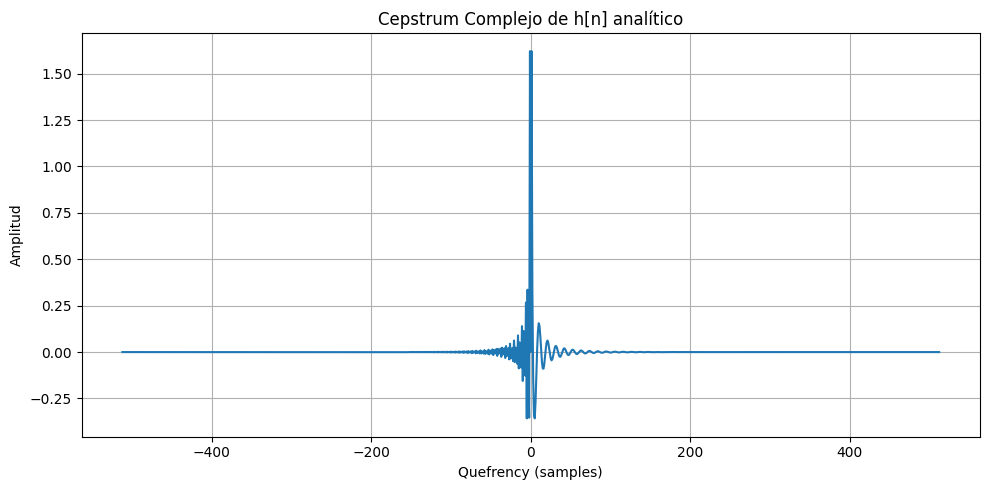

In [28]:
b = 0.98 * np.exp(1j * 0.81 * np.pi)
c = 0.98 * np.exp(1j * 0.19 * np.pi)
n_max = 512

# Calcular el cepstrum
n = np.arange(-n_max, n_max + 1)

hat_h_analitico = np.zeros(len(n))

# Calcular parte negativa (n <= -1)
mask_neg = n <= -1
n_vals_neg = n[mask_neg]
hat_h_analitico[mask_neg] += (2/n_vals_neg) * np.abs(b)**(-n_vals_neg) * np.cos(n_vals_neg * np.angle(b))

# Calcular parte positiva (n >= 1)
mask_pos = n >= 1
n_vals_pos = n[mask_pos]
hat_h_analitico[mask_pos] += (2/n_vals_pos) * np.abs(c)**(n_vals_pos) * np.cos(n_vals_pos * np.angle(c))


plt.figure(figsize=(10, 5))
plt.plot(n, hat_h_analitico)
plt.grid()
plt.xlabel('Quefrency (samples)')
plt.ylabel('Amplitud')
plt.title(f'Cepstrum Complejo de h[n] analítico')
plt.tight_layout()
plt.show()

3.

Considerando ahora la señal, $s[n]=h[n]*p[n]$, se procede a calcular su cepstrum complejo

$S(z)=\mathcal{Z}{(s[n])}=\mathcal{Z}{(h[n]*p[n])}=\mathcal{Z}(h[n])\mathcal{Z}(p[n])=H(z)P(z)$

$\hat{S(z)}=\log{(S(z))}=\log{(H(z)P(z))}=\log{(H(z))} + \log{(P(z))} =\hat{H(z)} + \hat{P(z)}$

$\hat{s[n]}=\mathcal{Z^{-1}}(\hat{H(z)})+\mathcal{Z^{-1}}(\hat{P(z)})=\hat{h[n]}+\hat{p[n]} = \frac{2}{n}|c|^{n}\cos{(n\theta_c)}u[n-1] + \frac{2}{n} |b|^{-n} \cos{(n\theta_b)}u[-n-1]+\frac{P \beta^n}{n} \sum_{k=1}^{\infty}\delta[n-kP]$



4.

In [29]:
def generar_transferencia(x=None, B=None, A=None, N=512):
    if x is not None:
        H = np.fft.fft(x, n=N)
    elif A is not None and B is not None:
        _, H = signal.freqz(B, A, worN=N, whole=True)
    else:
        raise ValueError("Debes proporcionar B y A o x.")
    return H

def cepstrum_complejo(x=None, B=None, A=None, N=512):
    """
    Cepstrum complejo de una señal x[n] real o de un sistema con función de transferencia B(z)/A(z).

    Args:
        x (np.array): señal de entrada. 
        B (np.array): Coeficientes del numerador de la función de transferencia.
        A (np.array): Coeficientes del denominador de la función de transferencia.
        N (int): Cantidad de muestras de la DFT. Defaults to 512.

    Returns:
        np.array: Cepstrum complejo de la señal o sistema.
        int: Delay de fase
    """

    H = generar_transferencia(x, B, A, N)

    # magnitude 
    magH = np.abs(H)
    # phase
    phaseH = np.angle(H)
    # phase unwraped
    phaseH_unw1 = np.unwrap(phaseH)

    # === elimination of the linear phase component

    # index of the phase value at pi
    ind_pi = int(np.floor((N+1)/2))

    # compute the linear phase factor
    delay = round(phaseH_unw1[ind_pi]/np.pi)

    # compute the linear phase component
    ph_lin_component = delay * np.pi * np.arange(N) / ind_pi

    # substract the linear phase component
    phaseH_unw2 = phaseH_unw1 - ph_lin_component; 

    # check that phase at 0 and pi frequency is 0
    assert np.isclose(phaseH_unw2[0], 0, atol=1e-6), "Phase value at zero is not 0, phase_unwrapped[0] = " + str(phaseH_unw2[0])
    assert np.isclose(phaseH_unw2[ind_pi], 0, atol=1e-6), "Phase value at pi is not 0, phase_unwrapped[pi] = " + str(phaseH_unw2[ind_pi])

    logH = np.log(magH) + 1j * phaseH_unw2

    # IDFT
    hat_h = np.real(np.fft.ifft(logH))

    return hat_h, int(delay)

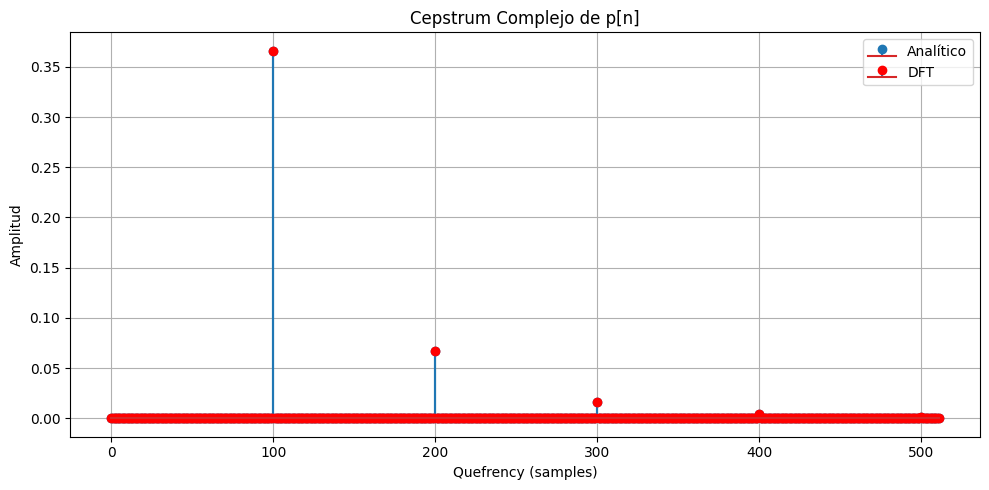

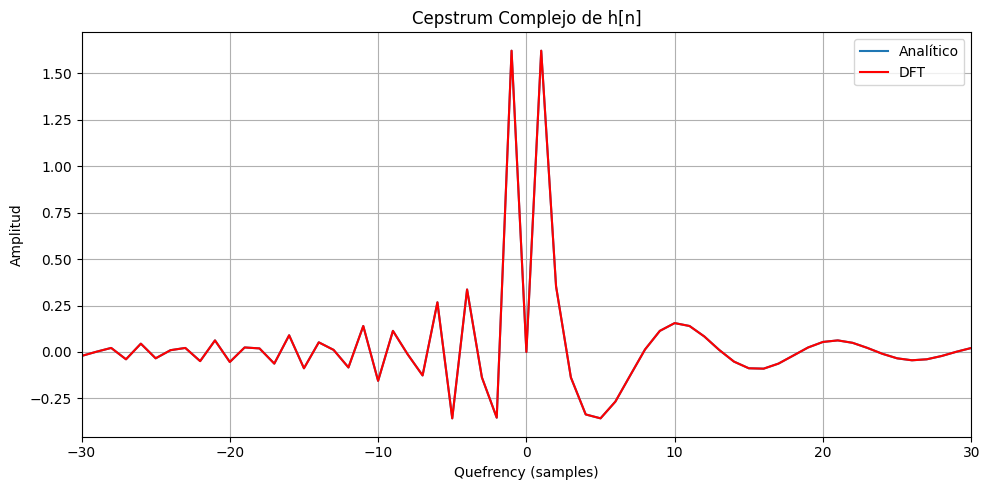

In [30]:
N = 1024         # number of samples
P = 100
beta = 0.99
b = 0.98 * np.exp(1j * 0.81 * np.pi)
c = 0.98 * np.exp(1j * 0.19 * np.pi)

# generar p[n]
p = np.zeros(N)
k = np.arange(1, np.floor((N-1)/P)+1)
kP = k * P
kP = kP.astype(int)
p[kP] = beta**kP
p[0] = 1

## cepstrum complejo de p[n]
hat_p = cepstrum_complejo(x=p, N=N)[0]

## cepstrum complejo de h[n]
B = np.array([np.abs(b)**2, -2*np.abs(b)*np.cos(np.angle(b)), 1])
A = np.array([1, -2*np.abs(c)*np.cos(np.angle(c)), np.abs(c)**2])
hat_h = cepstrum_complejo(B=B, A=A, N=N)[0]

plt.figure(figsize=(10, 5))
plt.stem(hat_p_analitico[:N//2], label='Analítico')
plt.stem(hat_p[:N//2], label='DFT', markerfmt='ro')
plt.grid()
plt.xlabel('Quefrency (samples)')
plt.ylabel('Amplitud')
plt.title(f'Cepstrum Complejo de p[n]')
plt.tight_layout()
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(np.arange(-N/2, N/2 + 1), hat_h_analitico, label='Analítico')
plt.plot(np.arange(-N/2 , N/2), np.fft.fftshift(hat_h), label='DFT', color='red')
plt.grid()
plt.xlabel('Quefrency (samples)')
plt.ylabel('Amplitud')
plt.title(f'Cepstrum Complejo de h[n]')
plt.xlim(-30, 30)
plt.legend()
plt.tight_layout()
plt.show()

5.

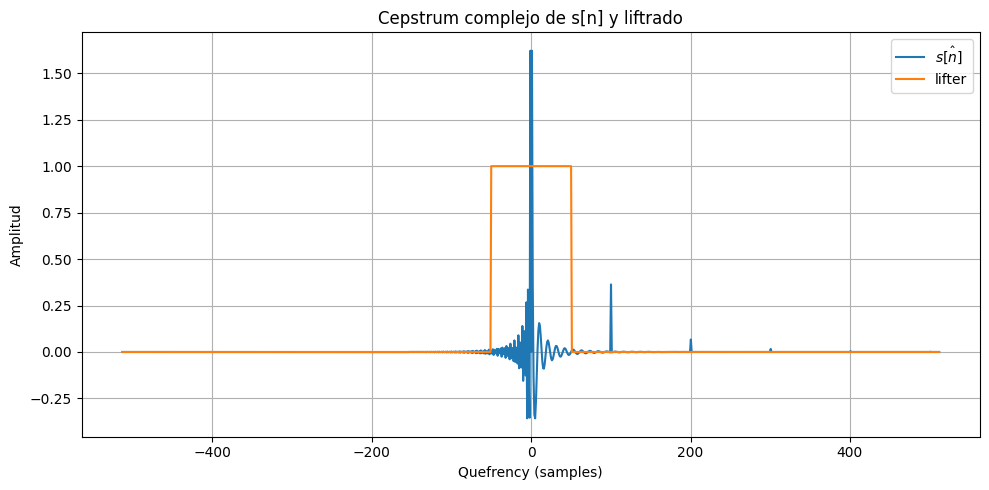

In [31]:
# generar h[n]
_, H = signal.freqz(B, A, worN=N, whole=True)
h = np.real(np.fft.ifft(H))

# generar s[n]
s = np.convolve(p, h, mode='full')[:N]

# cepstrum complejo de s[n]
hat_s, delay_s = cepstrum_complejo(x=s, N=N)

# lifter
lifter_length = int(P/2)
lifter = np.zeros(N)
lifter[:lifter_length + 1] = 1
lifter[-lifter_length:] = 1

# graficar s_hat
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-N/2-1, N/2, N), np.fft.fftshift(hat_s), label="$\\hat{{s[n]}}$")
plt.plot(np.linspace(-N/2-1, N/2, N), np.fft.fftshift(lifter), label="lifter")
plt.grid()
plt.xlabel('Quefrency (samples)')
plt.ylabel('Amplitud')
plt.title(f'Cepstrum complejo de s[n] y liftrado')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
def cepstrum_complejo_inverso(x_hat):
    X_hat = np.fft.fft(x_hat)
    X = np.exp(X_hat)
    return np.real(np.fft.ifft(X))

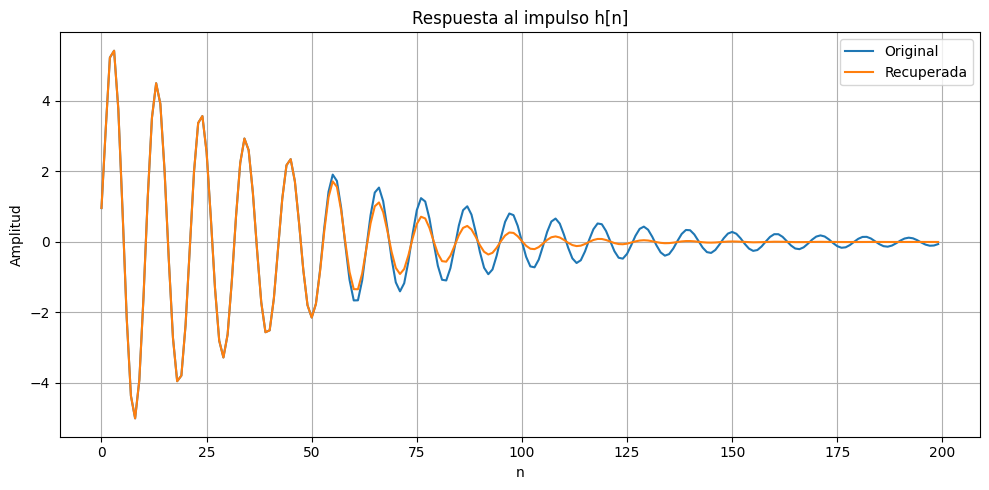

In [33]:
# Liftering para recuperar h[n]
h_recovered = cepstrum_complejo_inverso(hat_s * lifter)
h_recovered = np.roll(h_recovered, -delay_s)

plt.figure(figsize=(10, 5))
plt.plot(h[:200], label="Original")
plt.plot(h_recovered[:200], label="Recuperada")
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title(f'Respuesta al impulso h[n]')
plt.legend()
plt.tight_layout()
plt.show()

Las diferencias observadas entre la respuesta al impulso original y la recuperada se deben a que una porción muy pequeña de $\hat{h}[n]$ se ha perdido en el proceso de liftrado. A pesar de estas pequeñas diferencias, la forma general de la respuesta al impulso se mantiene, demostrando la efectividad del método para la deconvolución de la señal.

## Parte 2
Algunas aplicaciones del cepstrum real en señales de voz son la estimación de la frecuencia fundamental y la detección de formantes. Para eso, se procesa la señal en fragmentos de tiempo corto y se calcula el cepstrum real de cada fragmento. La presencia de un pico en la región de medianas o altas quefrencys es un indicador de sonoridad y la quefrency del pico indica el período.

Se sugiere seguir los siguientes pasos para estimar la evolución de la frecuencia fundamental de la señal de voz del archivo [*tamy-vocals.wav*](./Archivos_P4/problema1/tamy-vocals.wav)

  1. Calcular el cepstrum de tiempo corto de la señal. Graficar el resultado en el plano tiempo-quefrency eliminando los componentes de bajas quefrencys para la correcta visualización del cepstrum del tren de pulsos periódico en las regiones sonoras.
  2. A partir de la presencia y posición del pico construir un algoritmo para la detección de sonoridad y frecuencia fundamental. Establecer la frecuencia fundamental en 0 Hz en las regiones en donde el sonido es sordo. Comparar el resultado con el [*ground-truth*](./Archivos_P4/problema1/tamy-vocals_ground_truth.csv).
  



In [34]:
sr, data = io.wavfile.read(dir_files+'problema1/tamy-vocals.wav')
Audio(data=data, rate=sr)

1.

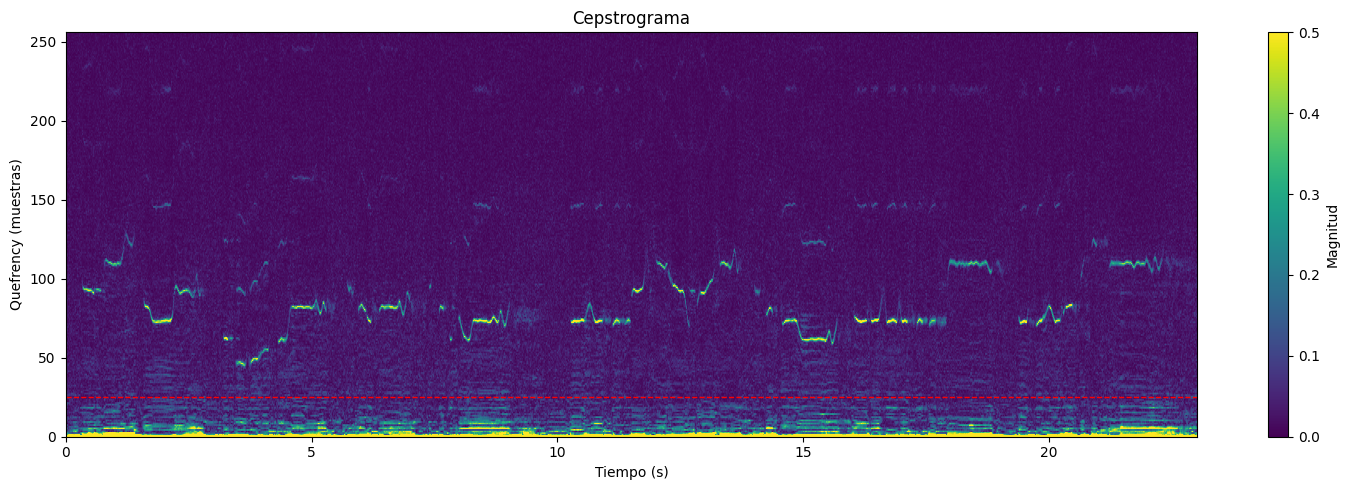

In [35]:
# length of the input signal
M = len(data)

# length of the analysis window in samples
L = 512

# hop size in samples.
R = int(L/2)

# total number of analysis frames
num_frames = int(np.floor((M-L)/R))

# analysis window
window = signal.windows.get_window('hann', L)

ceps = np.zeros((L,num_frames))

# for each analysis frame
for ind in range(num_frames):
    n_ini = ind * R

    frame = data[n_ini:n_ini+L] * window

    # compute the real cepstrum
    spectrum = np.abs(np.fft.fft(frame, n=L))
    log_spectrum = np.log(spectrum + 1e-10)
    ceps_frame = np.real(np.fft.ifft(log_spectrum))
    
    ceps[:,ind] = ceps_frame

    
plt.figure(figsize = (15,5))
time_axis = np.arange(num_frames) * (R / sr)
plt.imshow(np.abs(ceps[0:L//2, :]),aspect='auto', origin='lower',vmin=0, vmax=0.5,
            extent=[time_axis[0], time_axis[-1], 0, L//2])
plt.colorbar(label='Magnitud')
plt.hlines(25, time_axis[0], time_axis[-1], color='r', linewidth=1, linestyles='dashed')
plt.ylabel('Quefrency (muestras)')
plt.xlabel('Tiempo (s)')
plt.title('Cepstrograma')
plt.tight_layout()
plt.show()

Se logra identificar que el período del tren de impulsos periódico es aproximadamente 50, por lo tanto se procedió a liftrar en 25, como se marca con una línea roja.

2.

n = 241
fundamental_idx = 88
f0 = 272.72727272727275


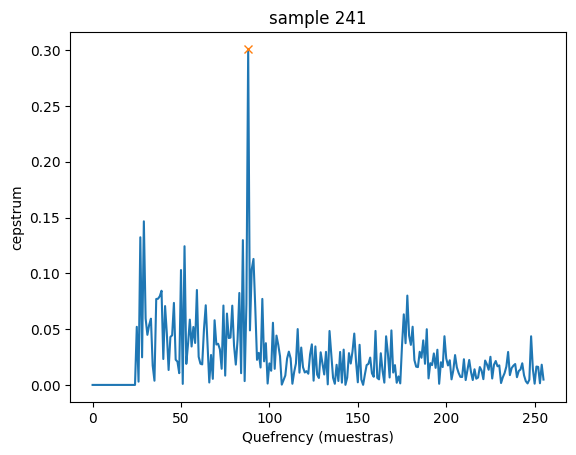

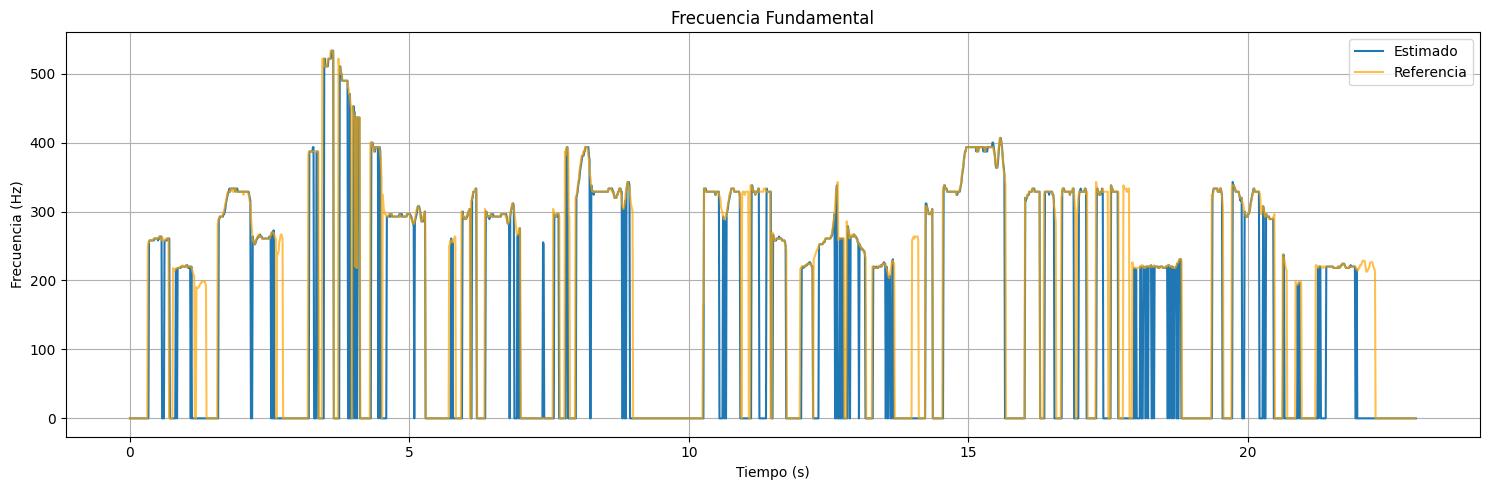

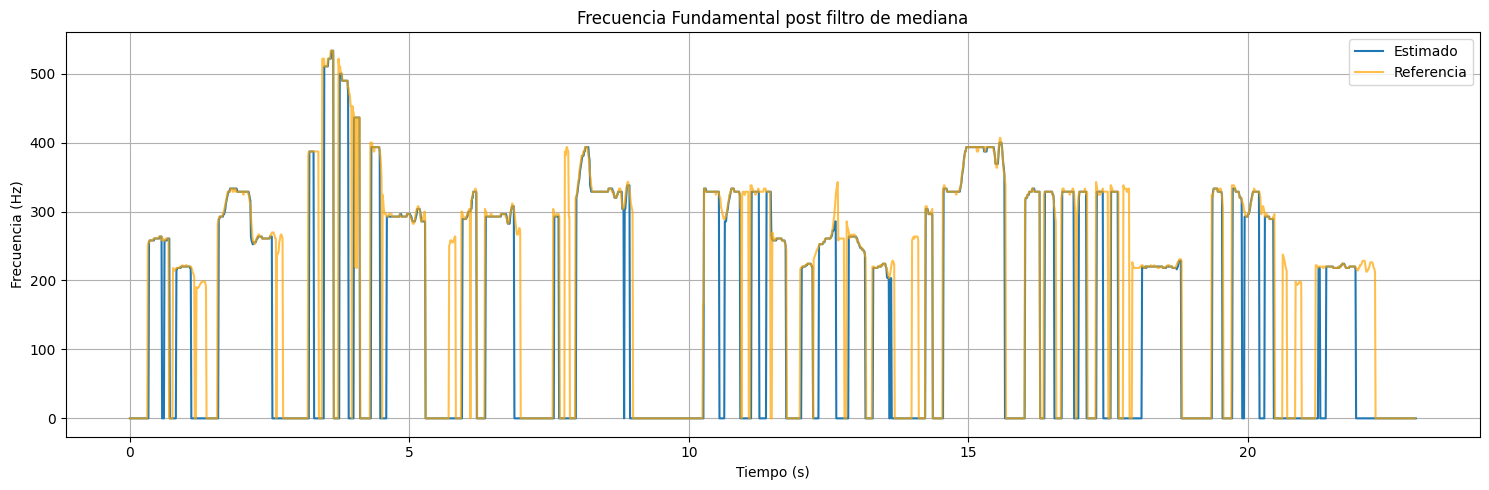

In [36]:
ceps_lifted = abs(ceps).copy()
ceps_lifted[0:25, :] = 0

f0_detection = np.zeros(ceps_lifted.shape[1])
for n in range(ceps_lifted.shape[1]):
    f = ceps_lifted[:,n]

    peaks, _ = signal.find_peaks(f[:L//2], height=0.3)
        
    if len(peaks) == 0:
        f0_detection[n] = 0
    else:
        fundamental_idx = peaks[0]
        f0_detection[n] = sr/fundamental_idx

    if n==241:
        plt.figure()
        plt.plot(f[:L//2])
        plt.plot(fundamental_idx , f[fundamental_idx], "x")
        plt.xlabel('Quefrency (muestras)')
        plt.ylabel('cepstrum')
        plt.title("sample " + str(n))
        print(f"n = {n}")
        print(f"fundamental_idx = {fundamental_idx}")
        print(f"f0 = {f0_detection[n]}")



gt_data = np.loadtxt(dir_files+'problema1/tamy-vocals_ground_truth.csv', delimiter=',', skiprows=1)
gt_times, gt_f0 = gt_data[:, 0], gt_data[:, 1]

plt.figure(figsize = (15,5))
plt.plot(np.arange(len(f0_detection))*(R / sr), f0_detection, label='Estimado')
plt.plot(gt_times*sr/100, gt_f0, label='Referencia', color='orange', alpha=0.7)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Frecuencia Fundamental')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

f0_detection = signal.medfilt(f0_detection, kernel_size=7)

plt.figure(figsize = (15,5))
plt.plot(np.arange(len(f0_detection))*(R / sr), f0_detection, label='Estimado')
plt.plot(gt_times*sr/100, gt_f0, label='Referencia', color='orange', alpha=0.7)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Frecuencia Fundamental post filtro de mediana')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Ejercicio 2

## Parte 1

En el modelo de predicción lineal se asume que la muestra actual de la señal de voz $s[n]$ es predecible a partir de una combinación lineal de $p$ muestras previas,

$$\tilde{s}[n] = \sum_{k=1}^{p}\alpha_k s[n-k]$$

El problema consiste en encontrar los coeficientes $\alpha_k$ del predictor que mejor aproximan a la señal $s[n]$. Para eso se define el error de predicción como

$$e_n[m] = s_n[m] - \tilde{s}_n[m]$$

donde $s_n[m]$ es un fragmento de tiempo corto de la señal de voz elegido en torno a la muestra $n$.

Se define el error cuadrático medio de predicción como

$$E_n = \sum_m e_n^2[m]$$

para algún intervalo de muestras $m$ que no es necesario especificar por el momento. 
En el modelo de predicción lineal, el conjunto de coeficientes $\lbrace\hat{\alpha}_k\rbrace$ óptimo es el que minimiza el error cuadrático medio de predicción. Se pide: 


1. Demostrar que los coeficientes que minimizan el error cuadrático medio obedecen el siguiente sistema lineal de ecuaciones (*ecuaciones normales*),

    $$\sum_{k=1}^{p}\hat{\alpha}_k\sum_m s_n[m-i]s_n[m-k]=\sum_m s_n[m-i]s_n[m],\,\,\,1\leq i \leq p$$

1. Demostrar que el error cuadrático medio mínimo de predicción es

    $$E_n = \sum_m s_n^2[m]-\sum_{k=1}^p\hat{\alpha}_k\sum_m s_n[m]s_n[m-k]$$


1.

$$E_n = \sum_m {(s_n[m] - \tilde{s}_n[m])}^2= \sum_m {\left(s_n[m] - \sum_{k=1}^{p}\alpha_k s[m-k] \right)}^2$$
$$\frac{\partial E_n}{\partial \alpha_i} = 2 \sum_m {\left(s_n[m] - \sum_{k=1}^{p} \alpha_k s[m-k] \right)(-s_n[m-i])} = 2\sum_m{\left(-s_n[m]s_n[m-i] + s_n[m-i]\sum_{k=1}^{p} \alpha_k s_n[m-k] \right)}$$
$$\frac{\partial E_n}{\partial \alpha_i} = 0 \iff \sum_{k=1}^{p} \alpha_k \sum_m s_n[m-i]s_n[m-k]=\sum_m s_n[m-i]s_n[m] \quad \text{(1)}$$

2.

Multiplicando la ecuación (1) por $\alpha_i$ y sumando sobre i:

$$ \sum_{i=1}^{p} \alpha_i \sum_{k=1}^{p} \alpha_k \sum_m s_n[m-i]s_n[m-k]= \sum_{i=1}^{p}\alpha_i\sum_m s_n[m-i]s_n[m] \quad \text{(2)}$$
$$  \Rightarrow \sum_m \left( \sum_{k=1}^p \alpha_k s_n[m-k] \right)^2 = \sum_m \sum_{k=1}^{p}\alpha_k s_n[m-k]s_n[m] \quad \text{(3)}$$

Planteamos el error de predicción:

$$\begin{align*}
    E_n  &=  \sum_m (s_n[m] - \tilde{s}_n[m])^2 \\
    &= \sum_m \left( s_n[m] - \sum_{k=1}^p \hat{\alpha}_k s_n[m-k] \right)^2 \\
    &=  \sum_m \left( s_n^2[m] - 2 s_n[m] \sum_{k=1}^p \hat{\alpha}_k s_n[m-k] + \left( \sum_{k=1}^p \hat{\alpha}_k s_n[m-k] \right)^2 \right) \\
    &=   \sum_m s_n^2[m] - 2 \sum_m s_n[m] \sum_{k=1}^p \hat{\alpha}_k s_n[m-k] + \sum_m \left( \sum_{k=1}^p \hat{\alpha}_k s_n[m-k] \right)^2\\
\end{align*}$$

Utilizando la ecuación (3) en la expresión de $E_n$ obtenemos el error mínimo pues proviene de las ecuaciones normales:

$$\begin{align*}
    E_n^{min}  &=  \sum_m s_n^2[m] - 2 \sum_m s_n[m] \sum_{k=1}^p \hat{\alpha}_k s_n[m-k] + \sum_m \sum_{k=1}^{p}\alpha_k s_n[m-k]s_n[m] \\
    &=  \sum_m s_n^2[m] -  \sum_{k=1}^p \hat{\alpha}_k \sum_m s_n[m]  s_n[m-k]\\
\end{align*}$$



## Parte 2

En este problema se aplica la técnica de LPC para la clasificación de vocales, usando una base de datos de vocales aisladas pronunciadas por dos hablantes.

El procedimiento consiste en calcular el modelo todo polos de la señal de voz, y a partir de los polos obtener la frecuencia de las dos primeras formantes $\left(F_1,\,F_2\right)$. 


A modo de referencia, en el cuadro de abajo se indica la frecuencia promedio de las dos primeras formantes de las vocales del idioma español (Estos datos son aproximaciones de los datos provistos en https://joaquimllisterri.cat/phonetics/fon_anal_acus/caract_acust.html). 


La señal analizada puede clasificarse a partir la vocal de referencia mas cercana en el plano $\left(F_1,\,F_2\right)$.

| Fonema | $F_1(Hz)$ | $F_2(Hz)$ |
|:------:|:---------:|:---------:|
|   /a/  |    800    |    1170   |
|   /e/  |    480    |    2300   |
|   /i/  |    240    |    2800   |
|   /o/  |    510    |    960    |
|   /u/  |    250    |    630    |

<center>**Primeras dos formantes de las vocales en el idioma español.**</center>


1. Implementar un algoritmo para procesar todas las señales de la base de datos, calculando para cada una la frecuencia de las dos primeras formantes. Mostrar los resultados como un mapa de formantes en el plano $\left(F_1,\,F_2\right)$.
1. Clasificar las señales a partir de las vocales de referencia. Reportar la tasa de acierto obtenida para cada vocal y para cada hablante.
1. Analizar los resultados y proponer alguna estrategia para mejorarlos. 
    

Las señales de la base de datos están muestreadas a 8000 Hz. Hay un directorio por hablante y el nombre de los archivo de audio es **[vocal]-[número].wav**, con **número** de 1 a 10. 
Los archivos contienen un único fonema, de duración variable (sin silencio al comienzo o al final), pero todos superan las 550 muestras.


Tener en cuenta los siguientes aspectos. 

- Se sugiere tomar una ventana centrada en la muestra central de cada señal. 
- Elegir adecuadamente el tamaño de la ventana $N$ y el orden $p$ del modelo.
- Calcular los polos y representarlos en un diagrama de polos y ceros. 
- Eliminar los polos reales y los polos con $\omega\geq\pi$ (Son redundantes por ser complejos conjugados de los polos con $\omega<\pi$). Eliminar los polos de ancho de banda mayor a cierto umbral. Elegir adecuadamente el umbral.
- Establecer la frecuencia de las dos primeras formantes como la frecuencia de los dos polos de menor frecuencia.


In [37]:
### Cargar los audios y asignarle una etiqueta del tipo #hablante-vocal
vocales = ['a','e','i','o','u']
folders = ['/problema2/vocales/martin/','/problema2/vocales/cecilia/']
indices = np.arange(1,11)

files_list = []
labels = []

for folder in folders:
  for vocal in vocales:
    for indice in indices:
      _, audio = io.wavfile.read(dir_files + folder + vocal + '-' + str(indice) + '.wav')
      files_list.append(audio)
      labels.append(str(folders.index(folder)) + '-' + vocal)
      
# Frecuencia de muestreo
fs = 8000

In [38]:
# Escuchar vocal del hablante 1
Audio(files_list[45], rate=fs)

In [39]:
# Escuchar vocal del hablante 2
Audio(files_list[95], rate=fs)

1.

In [40]:
def lpc_analysis(s, p=20):
    """ 
    Compute the LPC analysis using the autocorrelation method
    
    Parameters
    ----------
    s : numpy array
        windowed signal frame as a numpy 1D array.
    p : int
        model order.
        
    Returns
    -------
    ak : numpy array
        model coefficients.
    e : float
        minimum mean squared error.
    e_norm : float
        normalized minimum mean squared error.
    """
    # frame length
    N = s.shape[0]
    
    # compute autocorrelation values
    r = np.zeros((p+1, 1))
    for k in range(p+1):
        r[k] = np.dot(s[:(N-k)].T, s[k:])

    # solve to compute model coefficients
    ak = solve(toeplitz(r[:p]), r[1:p+1]).squeeze()

    # compute mean squared error
    e = r[0] - np.dot(ak.T, r[1:p+1])

    # compute normalized mean squared error
    e_norm = e / r[0]

    return ak, e, e_norm

In [41]:
def all_poles_system(ak, e, fs, Ndft=1024):
    """
    Complute all poles transfer function H(z) from LPC model coefficients.
    

                          sqrt(e) 
    H(z) =  ---------------------------------------------
            (1 - a_1 z^{-1} - a_2 z^{-2} - ... - a_p z^{-p})

    
    Parameters
    ----------
    ak : numpy array
        LPC model coefficients of shape (p,).
    e : float
        Prediction error (minimum mean squared error).
    fs : int
        Sampling frequency in Hz.
    Ndft : int, optional
        Number of points for the frequency response computation. Default is 1024.

        
    Returns
    -------
    H : numpy array
        The frequency response of the LPC model.
    zeros : numpy array
        The zeros of the transfer function.
    poles : numpy array
        The poles of the transfer function.
    """
    
    num = np.sqrt(e)  # Gain based on prediction error
    den = np.concatenate([[1], -ak])  # Denominator coefficients

    # Compute the frequency response
    w, H = signal.freqz(num, den, worN=Ndft, whole=True)
    fw = w / (2 * np.pi) * fs  # Convert to Hz

    # Compute the poles and zeros
    zeros, poles, _ = signal.tf2zpk(num, den)

    return H, zeros, poles


In [42]:
def obtener_formantes(polos, fs, threshold_BW=200):
    """
    Obtiene las frecuencias de los dos primeros formantes de un sistema vocal a partir de los polos de su función de transferencia.

    Args:
        polos (np.array): Polos de la función de transferencia.
        fs (int): Frecuencia de muestreo.
        threshold_BW (float): Umbral de ancho de banda en Hz para filtrar los formantes.

    Returns:
        f1 (float): Frecuencia del primer formante en Hz.
        f2 (float): Frecuencia del segundo formante en Hz.
    """
    # Anchos de banda
    anchos_banda = (fs/np.pi)*np.log(1/np.abs(polos))   

    # Filtrar polos con parte imaginaria positiva y ancho de banda menor a threshold_BW
    polos_filtrados = [p for p, bw in zip(polos, anchos_banda) if np.imag(p) > 0 and bw<threshold_BW]

    if len(polos_filtrados) < 2:
        raise ValueError("No se encontraron suficientes formantes")

    frecuencias_rad = np.angle(polos_filtrados)            # Frecuencias en radianes
    frecuencias_hz = frecuencias_rad * fs / (2 * np.pi)    # Frecuencias en Hz

    frecuencias_hz = np.sort(frecuencias_hz)
    f1, f2 = frecuencias_hz[0], frecuencias_hz[1]
    return f1, f2

In [43]:
def plot_LPC_frequency_response(s_win, fs, H, Ndft=1024):
    # Compute FFT
    X = np.fft.fft(s_win, n=Ndft)
    f = np.fft.fftfreq(Ndft, 1/fs)  # Corrected frequency calculation
    magX = np.abs(X)

    # magnitude spectrum
    magH = np.abs(H)
    
    # Plot only positive frequencies
    ind_fmx = int(Ndft/2)
    
    plt.figure(figsize=(12,6))
    ax1 = plt.subplot()
    ax1.set_title('Signal frame spectrum and frequency response of LPC filter')
    ax1.plot(f[:ind_fmx], 20 * np.log10(magX[:ind_fmx]), 'k', label='Signal frame spectrum')
    ax1.plot(f[:ind_fmx], 20 * np.log10(magH[:ind_fmx]), 'r', label='LPC filter frequency response')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.legend()
    ax1.grid()
    plt.tight_layout()
    plt.show()

def diagrama_polos_ceros(z, p):
    plt.figure(figsize=(6,6))
    plt.scatter(np.real(z), np.imag(z), marker='o', color='C0', label='Zeros')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='C1', label='Poles')
    t = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.cos(t), np.sin(t), 'k--')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Poles and Zeros')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xticks(np.arange(-1, 1.1, 0.5))
    plt.yticks(np.arange(-1, 1.1, 0.5))
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [44]:
def clasificar_fonema(nuevo_dato):
    centroides = np.array([
        [800, 1170],  # /a/
        [480, 2300],  # /e/
        [240, 2800],  # /i/
        [510, 960],   # /o/
        [250, 630]    # /u/
    ])
    fonemas = ['/a/', '/e/', '/i/', '/o/', '/u/']
    distancias = cdist([nuevo_dato], centroides)
    indice_clase = np.argmin(distancias)
    return fonemas[indice_clase]

Ejemplo para el primer audio:

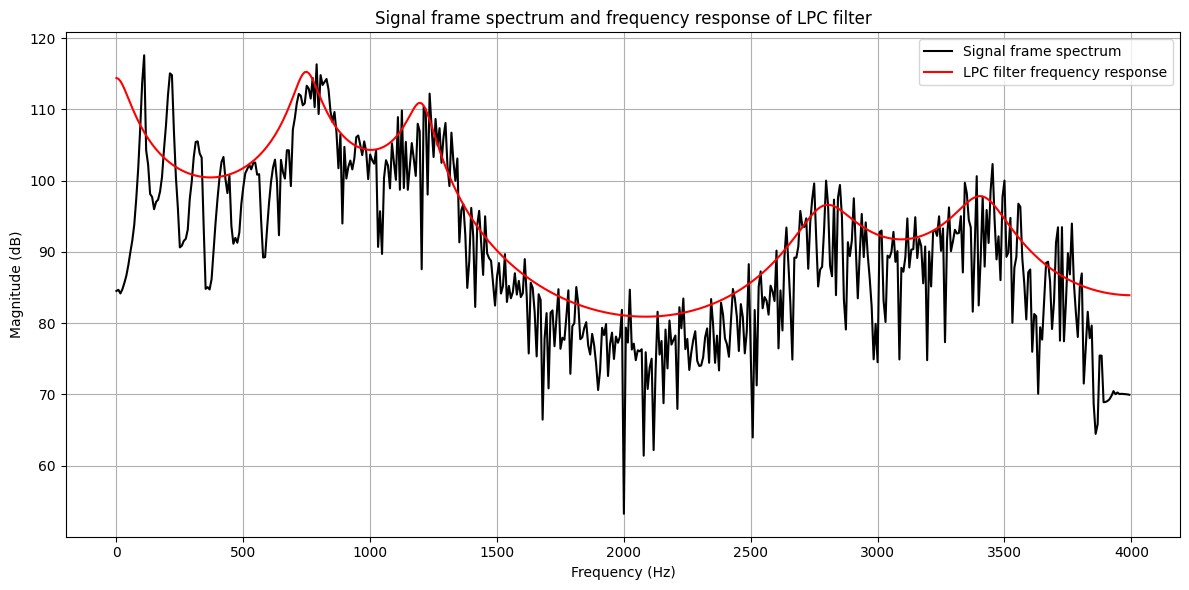

Formantes: 746.89 Hz, 1202.14 Hz


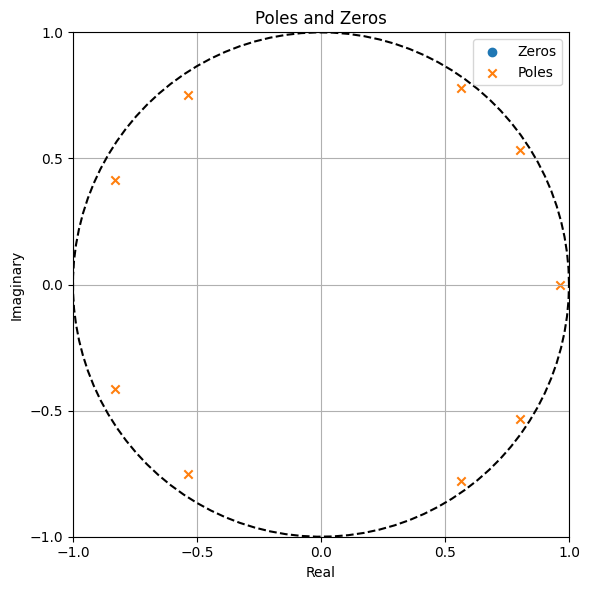

Clasificación: /a/, Etiqueta: /a/


In [45]:
file = files_list[0]
label = labels[0]

# windowed signal frame
N = len(file)
window = signal.windows.get_window('hann', N)
s_win = file * window

N_dft = 1024
p = 9 #int(fs/1000) 

ak, e, _ = lpc_analysis(s_win, p)
H, zeros, poles = all_poles_system(ak, e, fs, N_dft)
f1, f2 = obtener_formantes(poles, fs, threshold_BW=400)

plot_LPC_frequency_response(s_win, fs, H, N_dft)
print(f"Formantes: {f1:.2f} Hz, {f2:.2f} Hz")
diagrama_polos_ceros(zeros, poles)
pred = clasificar_fonema([f1, f2])

print(f"Clasificación: {pred}, Etiqueta: /{label.split('-')[1]}/")

Proceso toda la base de datos:

In [46]:
num_aciertos = {
    '/a/': 0,
    '/e/': 0,
    '/i/': 0,
    '/o/': 0,
    '/u/': 0,
    "cecilia": 0,
    "martin": 0
}
total = num_aciertos.copy()

data = []
for file, label in zip(files_list, labels):
    N = len(file)
    window = signal.windows.get_window('hann', N)
    s_win = file * window

    N_dft = 1024
    p = 9

    ak, e, _ = lpc_analysis(s_win, p)
    H, zeros, poles = all_poles_system(ak, e, fs, N_dft)
    f1, f2 = obtener_formantes(poles, fs, threshold_BW=400)

    hablante = 'martin' if label.split('-')[0] == '0' else 'cecilia'
    true = f"/{label.split('-')[1]}/"
    pred = clasificar_fonema([f1, f2])

    if pred == true:
        num_aciertos[true] += 1
        num_aciertos[hablante] += 1
    total[true] += 1
    total[hablante] += 1

    data.append((f1, f2, pred))

tasa_aciertos = {
    '/a/': num_aciertos['/a/']/total['/a/'],
    '/e/': num_aciertos['/e/']/total['/e/'],
    '/i/': num_aciertos['/i/']/total['/i/'],
    '/o/': num_aciertos['/o/']/total['/o/'],
    '/u/': num_aciertos['/u/']/total['/u/'],
    "cecilia": num_aciertos["cecilia"]/total["cecilia"],
    "martin": num_aciertos["martin"]/total["martin"]
}

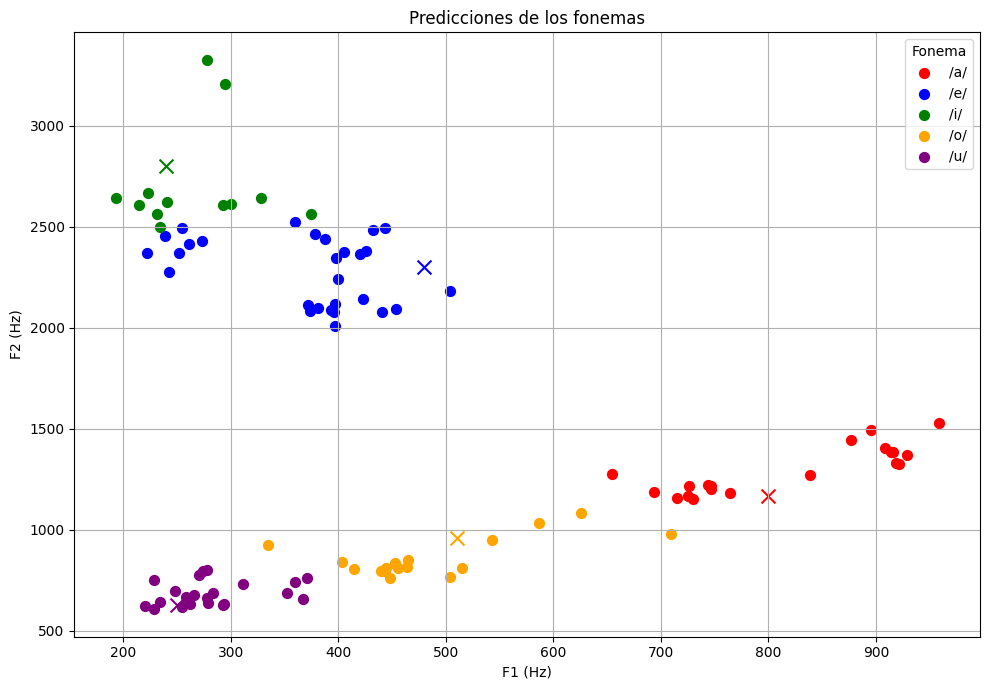

In [47]:
clases = ['/a/', '/e/', '/i/', '/o/', '/u/']
centroides = np.array([[800, 1170], [480, 2300], [240, 2800], [510, 960], [250, 630]])
colores = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(10, 7))
for i, clase in enumerate(clases):
    puntos_clase = [(f1, f2) for f1, f2, pred in data if pred == clase]
    f1_clase, f2_clase = zip(*puntos_clase)
    plt.scatter(f1_clase, f2_clase, label=clase, color=colores[i], marker='o', s=50)
    plt.scatter(centroides[i, 0], centroides[i, 1], color=colores[i], marker='x', s=100)
plt.xlabel('F1 (Hz)')
plt.ylabel('F2 (Hz)')
plt.legend(title='Fonema')
plt.grid()
plt.title('Predicciones de los fonemas')
plt.tight_layout()
plt.show()


In [48]:
print("Tasa de aciertos:")
tasa_aciertos

Tasa de aciertos:


{'/a/': 1.0,
 '/e/': 0.95,
 '/i/': 0.55,
 '/o/': 0.85,
 '/u/': 0.95,
 'cecilia': 0.92,
 'martin': 0.8}

Este método demostró ser robusto para la extracción de formantes, combinando el poder del análisis LPC con criterios específicos de filtrado basados en el conocimiento de las características acústicas de las vocales.

Como propuesta de mejora, en lugar de utilizar un valor fijo de $p$, se podría evaluar adaptar el orden del modelo a las características de cada señal de voz. Factores como la calidad de la grabación, la duración de la muestra, y la complejidad espectral de la vocal podrían justificar el uso de órdenes diferentes para obtener un modelado más preciso.